# <center><i> Exploratory Data Analysis (EDA) for text to prompt</i></center>
<br>
<center>by Green AI Innovations</center>
<br>

# <h1 style="font-style: italic;">Introduction:</h1> <br>

Data analysis has become a vital component of many fields, ranging from business and finance to healthcare and education. With the increasing availability of data, there is a growing need to analyze and make sense of this information to make informed decisions. Exploratory data analysis (EDA) is a fundamental step in the data analysis process, where data is explored and visualized to uncover patterns, relationships, and insights that may be hidden in the data. EDA involves a range of techniques, such as data cleaning, visualization, and statistical analysis, to gain a better understanding of the data and to inform subsequent steps in the data analysis process.
<br>
<br>
EDA is particularly useful for understanding complex datasets that may contain multiple variables and observations. By visualizing the data in different ways and exploring relationships between variables, EDA can help researchers and analysts identify potential areas of interest and hypotheses to test in further analysis. EDA can also be used to identify outliers, missing data, and other data quality issues, which can be addressed before proceeding with more advanced analysis. In summary, EDA is a powerful tool for gaining insights into data and for making informed decisions based on data analysis.

# <h3 style="font-style: italic;"> Problem specific details: </h3>
<br>

Image generation from text prompts is an interesting problem, as it is not a typical question-answering scenario, where there is a correct answer to a question. The success of such a task depends heavily on the ability of the model to generate an image that is relevant and coherent with the prompt text. Therefore, selecting an appropriate image generation model is crucial for this problem. To tackle this challenge, we opted for the Stable Diffusion model, which is an open-source and stable model for generating images from text prompts.
<br><br>
Collecting data for this task requires extensive experimentation with the Stable Diffusion prompts, as the process is mostly manual. We experimented with different prompt styles and settled on using an art style and minimizing the appearance of humans in the generated images. This approach helped us generate acceptable results that were suitable for the final video output.
<br><br>
The exploratory data analysis also sheds light on the manually collected transcripts and prompts. As the amount of data used for this task will be relatively low, we plan to utilize a fine-tuned transformer pre-trained model on the transcripts to generate prompts. This approach promises to work well with less data and can help us generate a sufficient amount of prompts that we can use for training the Stable Diffusion model.
<br><br>
In summary, image generation from text prompts is a challenging problem that requires careful consideration of the image generation model and the prompt selection process. The manual collection of transcripts and prompts for the experiment requires extensive experimentation and exploration of different prompt styles. The exploratory data analysis will be a crucial step in this process, as it can help us gain insights into the collected data and inform our approach for generating prompts using pre-trained transformer models.



# <h3 style="font-style: italic;"> What to do in this notebook: </h3>
<br>
Given the manual and experimental nature of the data collection process, the notebook's main goal is to provide an overview of the collected data's context and quality. This includes exploring the transcript and prompt data to gain insights into the prompt styles that were selected and how they relate to the generated images. The notebook will also showcase the quality of the generated images and highlight any potential issues or shortcomings that were encountered during the experiment. In addition, the notebook will compare the different prompt styles that were used in generating the images to evaluate their effectiveness in generating high-quality images. By doing so, the notebook aims to provide a comprehensive overview of the collected data, and its quality and context, which can inform future approaches to image generation from text prompts.


<br>
<br>
<hr style="height:1px; border-width:0; color:gray; background-color:gray">

# <h1 style="font-style: italic;"> Common imports & data loading</h1>

In [1]:
# tabular data & mathemtical operations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Data/Prompts_dataset.csv')

# <h1 style="font-style: italic;"> Overview on the dataset</h1>

In [2]:
df.head(5)

,Transcript_text,prompt
0,Mindfulness meditation can improve mental and ...,Create an artistic representation of a person ...
1,Climate change is affecting biodiversity aroun...,Create a painting that depicts the effects of ...
2,Effective time management is crucial for achie...,Create an illustration of a person using a pla...
3,"The Great Wall of China stretches over 13,000 ...",Create a detailed drawing or painting of a sec...
4,Procrastination can interfere with productivit...,Create a visual representation of a person bre...


In [3]:
# Data shape
print(f'data shape: {df.shape}')

data shape: (52, 2)


In [4]:
# Data types
print(df.dtypes)

Transcript_text    object
prompt             object
dtype: object


In [5]:
# Missing data
print(df.isnull().sum())

Transcript_text    0
prompt             0
dtype: int64


In [6]:
df.describe()

,Transcript_text,prompt
count,52,52
unique,51,50
top,Traveling can have many benefits for personal ...,Create an infographic that presents key financ...
freq,2,2


In [7]:
df['Transcript_text'].value_counts()[:3]

Traveling can have many benefits for personal growth and development. It exposes individuals to new cultures, languages, and perspectives, and enables them to step out of their comfort zone and challenge their assumptions. Traveling also promotes creativity, independence, and resilience, and provides opportunities for adventure and self-discovery. By traveling, individuals can broaden their horizons and gain a deeper appreciation for the world and themselves.                                                                        2
Mindfulness meditation can improve mental and physical health. It involves focusing on the present moment without judgment. Studies have shown that regular practice can reduce anxiety and depression symptoms, lower stress hormone levels, and improve immune function. Additionally, mindfulness meditation can improve attention and cognitive function, promote feelings of well-being, and increase happiness. All you need is a quiet space and a few minutes daily to 

In [8]:
df['prompt'].value_counts()[:3]

Create an infographic that presents key financial concepts and strategies in a visually appealing and easy-to-understand format. Use symbols, charts, and graphs that convey financial information, as well as images that reflect the importance of financial literacy in daily life, such as a piggy bank, a credit score, or a retirement plan.                                         2
Create a travel journal that documents a person's journey of personal growth through travel. Use images, sketches, and annotations that capture the sights, sounds, and emotions of different destinations, as well as reflections on the lessons and insights gained from the experience. The travel journal can include elements such as a passport, a map, a camera, or a journal.      2
Create a mural that depicts the impact of urbanization on the environment and society in a visually engaging and informative way. Use colors, shapes, and images that convey the different aspects and dimensions of urbanization, as well as 

<h3 style="color:blue;"> What does this tell us ?</h3>

<p style="font-size:14px"> The dataset contains 2 columns namely <strong>Transcript_text and prompt</strong>. The dataset contains 52 examples, no missing data, one duplicated transcript and 2 duplicated prompts. This is a mistake occured durcing the data collection as mentioned in the problem specific details earlier, the data was collected via experimenting and room for human errors are possible in that area, it is clearly a issue happened during the csv preparation. The solution here is to get rid of the duplicated prompts and transcript as part of cleaning step.</p>

# <h1 style="font-style: italic;">Clean the data</h1>

As for the cleaning step, obviously from the previous section we derived we need to remove duplicated transcripts and prompt but also we need to remove stop words. It is important to keep in mind that we might need the original dataset at some point to showcase the arts generated, thus creating a copy of the original dataset and cleaning that in preparation for the visualization part would be ideal; it allows us to access both the cleaned version and the original version at any point of this analysis.

In [9]:
df_clean = df.copy()

In [10]:
# Removing duplicated words
df_clean = df_clean.drop_duplicates()
df_clean = df.drop_duplicates(subset=['prompt'])

In [11]:
df_clean.describe()

,Transcript_text,prompt
count,50,50
unique,50,50
top,Mindfulness meditation can improve mental and ...,Create an artistic representation of a person ...
freq,1,1


In [12]:
df_clean['prompt'].value_counts()[:3]

Create an artistic representation of a person practicing mindfulness meditation in a peaceful natural setting, surrounded by trees and birds, with rays of sunlight shining through the branches.                                                                                                                                                                                        1
Create a series of illustrations that depict different types of meditation, such as sitting, walking, or lying down. Use colors, textures, and patterns that convey the calm and peacefulness of meditation, as well as the benefits for mental and emotional health. The illustrations can include elements such as a cushion, a candle, or a nature scene.                             1
Create a mixed media artwork that explores the relationship between social media and mental health. Use symbols and icons that represent different social media platforms and mental health concepts, as well as images that convey the emotional 

In [13]:
# Removing stop words 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define the stopwords to remove
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Apply the stopwords to a column
df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_clean['prompt'] = df_clean['prompt'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

C:\Users\moham\AppData\Local\Temp\ipykernel_6780\2660805450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
C:\Users\moham\AppData\Local\Temp\ipykernel_6780\2660805450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['prompt'] = df_clean['prompt'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [15]:
df_clean['prompt'].value_counts()[:3]

Create artistic representation person practicing mindfulness meditation peaceful natural setting, surrounded trees birds, rays sunlight shining branches.                                                                                                                                               1
Create series illustrations depict different types meditation, sitting, walking, lying down. Use colors, textures, patterns convey calm peacefulness meditation, well benefits mental emotional health. The illustrations include elements cushion, candle, nature scene.                               1
Create mixed media artwork explores relationship social media mental health. Use symbols icons represent different social media platforms mental health concepts, well images convey emotional psychological effects social media. The artwork include elements heart, screen, like button, hashtag.    1
Name: prompt, dtype: int64

In [16]:
# Removing punctuations
import string

# Define the punctuation to remove
punct = string.punctuation

In [17]:
# Apply the punctuation removal to a column
df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: x.translate(str.maketrans('', '', punct)))
df_clean['prompt'] = df_clean['prompt'].apply(lambda x: x.translate(str.maketrans('', '', punct)))

C:\Users\moham\AppData\Local\Temp\ipykernel_6780\1513376954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: x.translate(str.maketrans('', '', punct)))
C:\Users\moham\AppData\Local\Temp\ipykernel_6780\1513376954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['prompt'] = df_clean['prompt'].apply(lambda x: x.translate(str.maketrans('', '', punct)))


In [18]:
df_clean['prompt'].value_counts()[:3]

Create artistic representation person practicing mindfulness meditation peaceful natural setting surrounded trees birds rays sunlight shining branches                                                                                                                                           1
Create series illustrations depict different types meditation sitting walking lying down Use colors textures patterns convey calm peacefulness meditation well benefits mental emotional health The illustrations include elements cushion candle nature scene                                   1
Create mixed media artwork explores relationship social media mental health Use symbols icons represent different social media platforms mental health concepts well images convey emotional psychological effects social media The artwork include elements heart screen like button hashtag    1
Name: prompt, dtype: int64

In [24]:
# removing duplicated words 
df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))
df_clean['prompt'] = df_clean['prompt'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))

C:\Users\moham\AppData\Local\Temp\ipykernel_6780\838750824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Transcript_text'] = df_clean['Transcript_text'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))
C:\Users\moham\AppData\Local\Temp\ipykernel_6780\838750824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['prompt'] = df_clean['prompt'].apply(lambda x: ' '.join(sorted(set(x.split()), key=x.split().index)))


# <h1 style="font-style: italic;"> Visualize the data</h1>

In [142]:
# Get random sample of cleaned data
import random
random_number = random.randint(0, df.shape[0]-1)

Sample_Transcript_text = df_clean.iloc[random_number]['Transcript_text']
Sample_Prompt = df_clean.iloc[random_number]['prompt']

Sample_Original_Transcript_text = df.iloc[random_number]['Transcript_text']
Sample_Original_Prompt = df.iloc[random_number]['prompt']

print(f'Transcript sample: {Sample_Transcript_text} \n\n\n')
print(f'Prompt sample: {Sample_Prompt} ')

Transcript sample: Mindfulness practices meditation breathing exercises body awareness reduce stress improve wellbeing promotes relaxation concentration selfawareness enables individuals manage emotions thoughts effectively practiced various contexts home work nature requires regular practice reap benefits 



Prompt sample: Create serene landscape represents peaceful meditative environment Use colors textures lighting 


In [143]:
import spacy
from spacy.tokens import Doc
from spacy import displacy
from spacy.tokens import Span
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the Spacy model
nlp = spacy.load('en_core_web_sm')

In [144]:
# Load the medium-sized English model
nlp = spacy.load("en_core_web_md")

# Set threshold that determines acceptable similar words accuracy percentage
similarity_threshold = 0.65

# Process the texts with SpaCy
doc_transcript = nlp(Sample_Transcript_text)
doc_prompt = nlp(Sample_Prompt)

# Find similar words
similar_words = []
for token1 in doc_transcript:
    for token2 in doc_prompt:
        if token1.has_vector and token2.has_vector and token1.similarity(token2) > similarity_threshold:
            similar_words.append((token1.text, token2.text))

In [145]:
from collections import Counter

# Count the occurrences of transcript words
transcript_word_counter = Counter([word_pair[0] for word_pair in similar_words])

# Get the top 8 most common transcript words
top_5_transcript_words = [word[0] for word in transcript_word_counter.most_common(5)]

# Filter the similar_words list
filtered_similar_words = [word_pair for word_pair in similar_words if word_pair[0] in top_5_transcript_words]

Top 5 common transcript word and its prompt similar words, the colored words are prompt words. 
(Similarity percentage 65% and above)


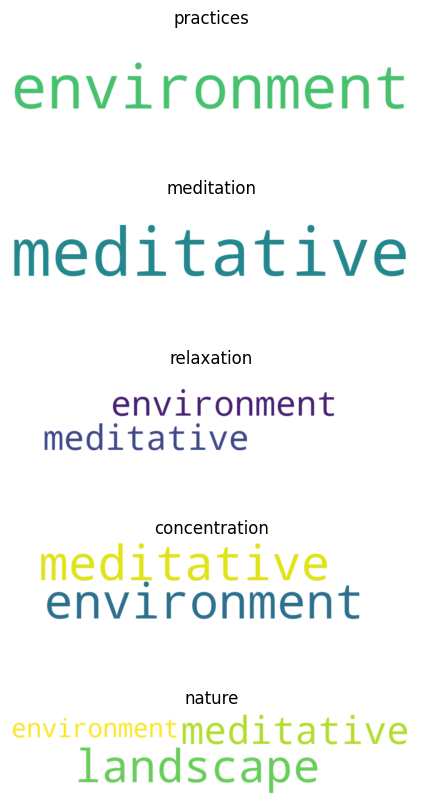

In [146]:
# Create a dictionary to store the words
transcript_prompt_dict = {}
for word_pair in filtered_similar_words:
    transcript_word, prompt_word = word_pair
    if transcript_word not in transcript_prompt_dict:
        transcript_prompt_dict[transcript_word] = []
    transcript_prompt_dict[transcript_word].append(prompt_word)

# Create a WordCloud object
wordcloud = WordCloud(width=900, height=200, background_color="white", colormap="viridis")

# Visualize the data
fig, axes = plt.subplots(nrows=len(transcript_prompt_dict), figsize=(10, 10))
fig.subplots_adjust(hspace=0.9)

for i, (transcript_word, prompt_words) in enumerate(transcript_prompt_dict.items()):
    # Generate wordcloud for each transcript word
    wordcloud.generate(" ".join(prompt_words))
    
    # Display the wordcloud
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].axis("off")
    axes[i].set_title(transcript_word)
    
print("Top 5 common transcript word and its prompt similar words, the colored words are prompt words. \n(Similarity percentage 65% and above)")
plt.show()


In [147]:
# Look at examples of the generated prompts

In [178]:
# Replace with your huggingface API KEY
HUGGING_FACE_API_KEY = ""

In [157]:
import requests

API_URL = "https://api-inference.huggingface.co/models/CompVis/stable-diffusion-v1-4"
headers = {"Authorization": f"Bearer {HUGGING_FACE_API_KEY}"}

def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.content

image_bytes = query({
    "inputs": Sample_Original_Prompt,
})

# You can access the image with PIL.Image for example
import io
from PIL import Image
image = Image.open(io.BytesIO(image_bytes))

Original Transcript:
Mindfulness practices, such as meditation, breathing exercises, and body awareness, can reduce stress and improve well-being. Mindfulness promotes relaxation, concentration, and self-awareness, and enables individuals to manage their emotions and thoughts more effectively. Mindfulness can be practiced in various contexts, such as at home, at work, or in nature, and requires regular practice to reap its benefits.


Original Prompt:
Create a serene landscape that represents a peaceful and meditative environment. Use colors, textures, and lighting




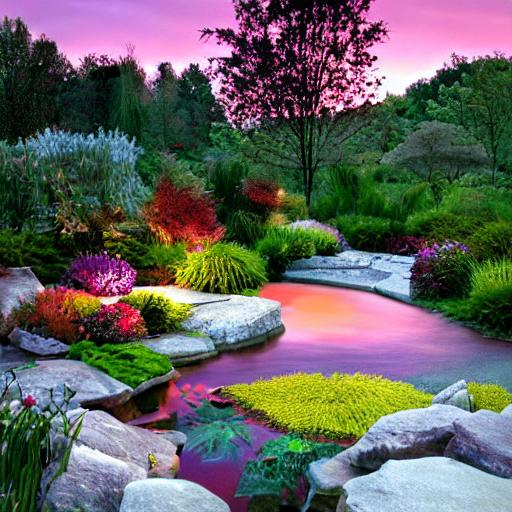

In [161]:
print(f"Original Transcript:\n{Sample_Original_Transcript_text}\n\n")
print(f"Original Prompt:\n{Sample_Original_Prompt}\n\n")
image

Original Transcript:
Traveling can have many benefits for personal growth and development. It exposes individuals to new cultures, languages, and perspectives, and enables them to step out of their comfort zone and challenge their assumptions. Traveling also promotes creativity, independence, and resilience, and provides opportunities for adventure and self-discovery. By traveling, individuals can broaden their horizons and gain a deeper appreciation for the world and themselves.


Prompt:
Create a travel journal that documents a person's journey of personal growth through travel. Use images, sketches, and annotations that capture the sights, sounds, and emotions of different destinations, as well as reflections on the lessons and insights gained from the experience. The travel journal can include elements such as a passport, a map, a camera, or a journal.


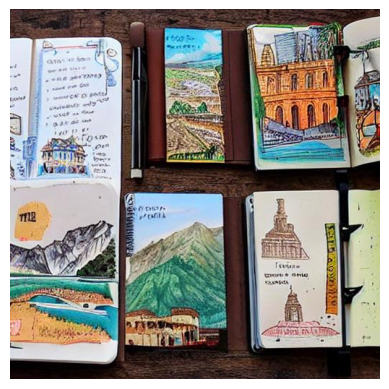

Original Transcript:
Social media has a significant impact on mental health, as it can affect self-esteem, body image, and social comparison, as well as increase stress, anxiety, and depression. Social media can also provide opportunities for social support, self-expression, and positive feedback, as well as enable access to information and resources. To mitigate the negative impact of social media on mental health, individuals need to practice digital well-being, such as setting boundaries, seeking help, and promoting positive content.


Prompt:
Create a digital artwork that reflects the impact of social media on mental health. Use symbols, emojis, and images that convey the emotions and attitudes involved in social media use, as well as the benefits and challenges for mental health. The artwork can include elements such as a heart, a like button, or a message bubble.


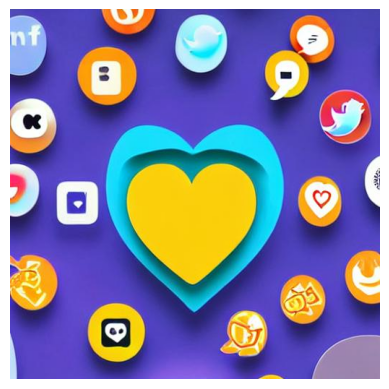

Original Transcript:
Gender stereotypes are pervasive cultural beliefs and expectations about the roles, traits, and behaviors associated with gender. Gender stereotypes can affect socialization, identity formation, and interpersonal relationships, as well as contribute to gender inequality and discrimination. Gender stereotypes also affect individuals' mental health and well-being, as they can lead to pressure, stigma, and self-doubt. To challenge gender stereotypes, individuals and communities need to promote gender diversity, respect, and inclusion.


Prompt:
Create a series of illustrations that challenge gender stereotypes and promote gender diversity. Use colors, shapes, and images that convey the complexity and fluidity of gender, as well as the benefits and values of gender diversity. The illustrations can include elements such as a person with different gender expressions, a rainbow, or a gender-neutral bathroom sign.


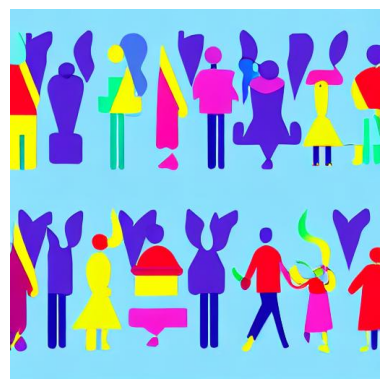

Original Transcript:
Social media has had a significant impact on politics, from grassroots movements to political campaigns and elections. It provides platforms for political discussion, activism, and mobilization. However, it also raises issues such as fake news, filter bubbles, and polarization. Social media algorithms can reinforce biases and create echo chambers, while spreading disinformation and propaganda. The impact of social media on politics is complex and multifaceted, with both positive and negative effects.


Prompt:
Create a digital artwork that explores the relationship between social media and politics. Use symbols and icons that represent political parties, candidates, and social media platforms, as well as images that convey the risks and benefits of online political discourse. The artwork can include elements such as hashtags, memes, and viral videos.


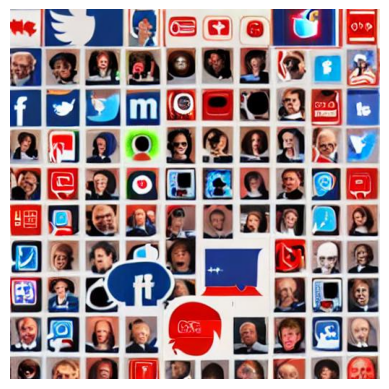

Original Transcript:
Good nutrition is vital for optimal brain health and function. A balanced diet that includes fruits, vegetables, whole grains, and lean proteins provides the nutrients your brain needs. Certain foods, such as fatty fish, nuts, and berries, have specific benefits for brain health, including improving memory, enhancing mood, and reducing the risk of cognitive decline. Make healthy food choices and avoid excessive sugar and processed foods to support brain health.


Prompt:
Create an artistic interpretation of a brain-shaped bowl filled with a variety of colorful fruits, vegetables, nuts, and seeds, with labels that highlight their specific nutrients and health benefits.


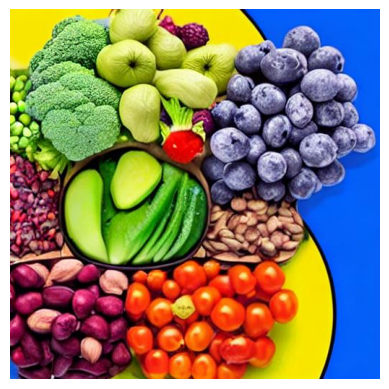

In [177]:
# Lets look at 5 examples
for x in range(0,5):
    random_number = random.randint(0, df.shape[0]-1)

    Sample_Original_Transcript_text = df.iloc[random_number]['Transcript_text']
    Sample_Original_Prompt = df.iloc[random_number]['prompt']
    image_bytes = query({
        "inputs": Sample_Original_Prompt,
    })

    image = Image.open(io.BytesIO(image_bytes))
    plt.imshow(image)
    print(f"Original Transcript:\n{Sample_Original_Transcript_text}\n\n")
    plt.axis('off')
    print(f"Prompt:\n{Sample_Original_Prompt}")
    plt.show()
    

# <h1 style="font-style:italic">Conclusion </h1>

<br>
<br>
In conclusion, the exploratory data analysis for the image generation from text prompts problem has provided valuable insights into the collected data and the challenges faced during the data collection process. With a limited dataset of 50 unique transcripts and prompts, it became clear that data quality and context are crucial factors in generating coherent images using the Stable Diffusion model. By focusing on an art style and minimizing the appearance of humans in the images, we were able to obtain satisfactory results, despite the model's occasional struggles with generating accurate human shapes.

<br>
<br>
The notebook presented in this project serves as an essential tool for understanding the context and quality of the collected data, as well as evaluating the effectiveness of different prompt styles. By comparing the various prompt styles and their impact on the generated images, we have gained a deeper understanding of the challenges and limitations associated with this image generation task. This knowledge will be instrumental in informing future approaches to image generation from text prompts and improving the overall process.

<br>
<br>
Moving forward, we will use the insights gained from this EDA to fine-tune a transformer pre-trained model on the collected transcripts, which will help us generate prompts for training the Stable Diffusion model. This approach should prove effective in producing high-quality images from the text prompts, which can then be aligned with the final output video, as outlined in the text-to-video project pipeline. By continuously refining our techniques and learning from our experiments, we will strive to improve the quality and relevance of the generated images to successfully address the challenging problem of image generation from text prompts.